In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**EXERCISE 1.** The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [ ]:
H0= 13.20

H1<13.20

In [6]:
n= 40 
sigma= 2.50
mu= 13.20
xbar= 12.20
α = 0.01

In [8]:
z_test= (xbar-mu)/(sigma/np.sqrt(n))
z_test

-2.5298221281347035

In [9]:
#z tablosundan 0.01 kritik değere baktığımızda Zα=-2,33 bulunur.
#z_test= -2,52 ve
Zα=-2.33 #ise


if z_test < Zα:
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


In [ ]:
# H0 hipotezimizi reddediyoruz. 

#### p-value kullanarak Hipotez testi yaparsak;

In [10]:
# z_test sonucumuzu formül yardmıyla bulmuştuk. 
# kümülatif dağılım fonksiyonu bize sol alan olasılığını veriyor. 
p_value = stats.norm.cdf(z_test) 
p_value

0.005706018193000826

In [11]:
# p_value ve α karşılaştırması yaparsak;
α = 0.01 
if p_value < α :
    print("Reject the Null")
else:
    print("Fail to Reject")

Reject the Null


In [ ]:
# sonuç olarak yine H= hipotezimizi reddedebiliriz. 
# Böylece bu şirket tarafından ödenen maaş ortalamaya eşit olmadığı için,  
# standartların altında ücret ödemekle suçlanabilir hipotezini reddedemeyiz. 

**EXERCISE 2.** Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [ ]:
# H0 anlamlı bir fark yoktur, H1 anlamlı bir fark vardır olarak belirlendiği için two tail olacak .
# yani α değerimizi α/2 olarak kullanacağız.
# sigma değerini bilmediğimiz için t testi yapacğız.
# iki tane örneklem olduğu için two sample t-test yapacağız.
# H0= iki grup arasındaki populasyon ortalamaları arasında anlamlı bir fark yoktur. (H0: μA = μB) 
# H1 = iki grup arasında anlamlı bir fark vardır. (H0: μA != μB) 
# Sonuç olarak : "independent Two-sample t_test" uygulayacağız.

In [40]:
# H0 : mu1 = mu2
# H1 : mu1 != mu2
# α = 0.01      
#α /2 = 0.005

In [31]:
dfsoil = pd.read_csv("soil - Sheet1.csv", sep = ",")
dfsoil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [41]:
dfsoil.shape

(35, 2)

In [42]:
dfsoil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [43]:
dfsoil.isnull().value_counts()

Soil1  Soil2
False  False    30
True   False     5
dtype: int64

In [44]:
#Soil1 sütununda NaN değerleri var onları onları görmezden gelmemiz için,
#  yada dropna ile silmemiz lazım, dropna ile silersek NaN olmayan yandaki diğer satırlarıda silmiş oluruz.
# burada silmeden NaN değerlerini görmezden gelmek için  "ttest_ind()" fonksiyonundaki nan_policy='omit' parametresini kullanacağız.
# ttest_ind() fonksiyonu bize  the Independent Two-sample test te ortalama için istatistik bilgilerini verecek.
indTest = stats.ttest_ind(dfsoil["Soil1"], dfsoil["Soil2"], nan_policy='omit')
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [ ]:
# farklı olarak
#indTest2 = stats.ttest_ind(dfsoil.dropna()["Soil1"], dfsoil["Soil2"])

# indTest2

# bu yöntemide kullanarak sadece Soil1 deki NaN ları silip aynı sonuca ulaşabiliriz.

In [46]:
p_value = 2.5932287323528147e-06
α = 0.01 #α /2 = 0.005

if p_value < α/2:
    print("Reject the Null")
else:
    print("Fail to reject")



Reject the Null


In [ ]:
# H0 hipotezimizi reddediyoruz. 

**EXERCISE 3.** The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.

**1.** Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

**2.** Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

**1. Kısmın Çözümü**

In [47]:
dfpisa = pd.read_csv("2015 PISA Test - Sheet1.csv", sep = ",")

dfpisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [48]:
dfpisa.sample(10)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
64,TTO,SA,69.198471,417.2434,427.2733,424.5905
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
19,DZA,AF,38.200000,359.6062,349.8593,375.7451
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
48,MNE,EU,68.119581,417.9341,426.8845,411.3136
67,URY,SA,64.600000,417.9919,436.5721,435.3630
36,JPN,AS,91.058028,532.4399,515.9585,538.3948
35,JOR,AS,60.114383,380.2590,408.1022,408.6691
42,LVA,EU,79.200600,482.3051,487.7581,490.2250


In [49]:
dfpisa.shape

(70, 6)

In [52]:
dfpisa.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [53]:
dfpisa.	Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

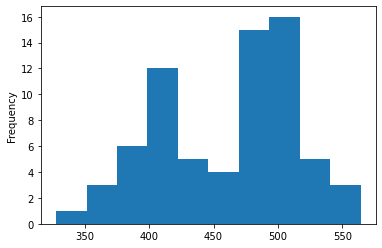

In [79]:
dfpisa.Math.plot.hist(bins=10);

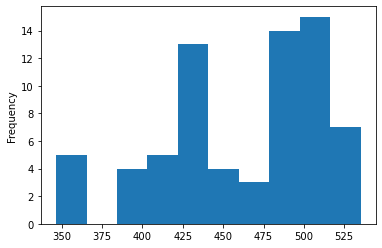

In [78]:
dfpisa.Reading.plot.hist(bins=10);

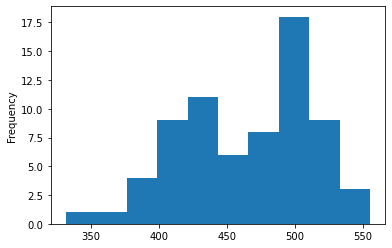

In [77]:
dfpisa.Science.plot.hist(bins=10);

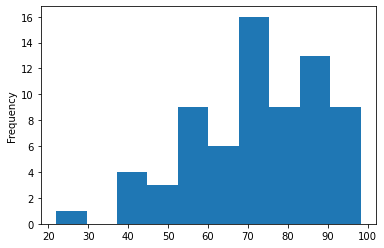

In [76]:
dfpisa.internet_users_per_100.plot.hist(bins=10);

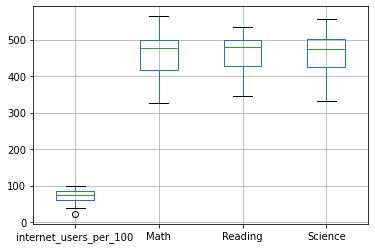

In [80]:
dfpisa.boxplot();

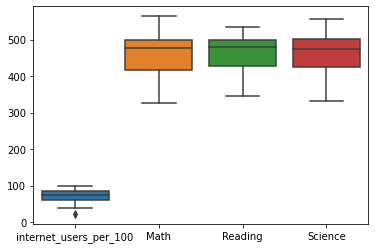

In [83]:
sns.boxplot(data=dfpisa);

In [84]:
dfpisa.var()

internet_users_per_100     268.652830
Math                      2843.790844
Reading                   2450.515182
Science                   2342.294243
dtype: float64

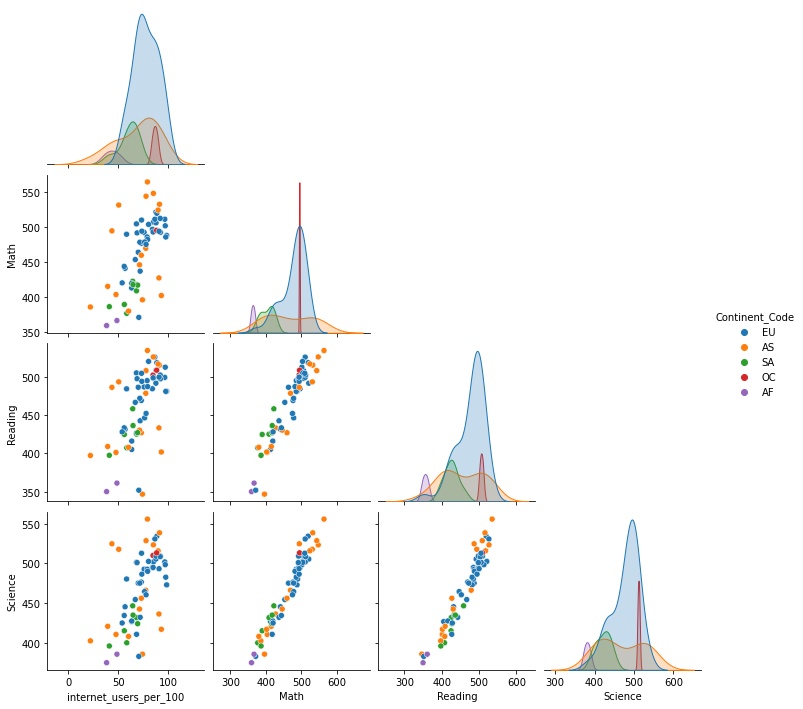

In [86]:
sns.pairplot(dfpisa, hue="Continent_Code", corner=True);

**2. Kısmın Çözümü**

In [ ]:
# iki kıtanın matematik ortalamalarını karşılaştıracağız.
# yüzde 95 güven aralığında anlamlı olup olmadıklarına bakacağız.
# iki yöne bakacağız. 
# H0 : muA = muB
# bu nedenle two-tailed dağılım olacak. 
# standart sapmayı bilmediğimizden t testi olacak. 
# iki örnek olduğundan two sample t test yapacağız. 
# iki gruptaki denekler arasında doğal bir eşleşme yoktur.
# H0:  iki grubun populasyon ortalamaları anlamlı ölçüde farklı değildir. 
# H0: muA = muB
# örneklem büyüklüğü: iki grup içinde keyfi.
# Bu soruda bağımsız iki örnekli t test i kullanacağız.
# "independent Two-sample t-test" 


In [ ]:
# Null hipotez İki grubun popülasyon ortalamalarının önemli ölçüde farklı olmadığıdır.
# alternatif hipotez ise H1 : muA != muB

In [ ]:
# stats.ttest_ind() fonksiyonunda NaN olası ihtimaline karşı nan_policy='omit' parametresi kullanacağız.


In [87]:
# soruda bizden EU ve AS kıtalarındaki matematik ortalamalarını karşılaştırmamızı istiyor.
# EU ve AS kıtalarını süzüp, dfEU ve dfAS olarak yeni değişkenlere atıyoruz.
dfEU = dfpisa[dfpisa["Continent_Code"]=="EU"]
dfAS = dfpisa[dfpisa["Continent_Code"]=="AS"]

In [88]:
statistic, pvalue = stats.ttest_ind(dfEU.Math, dfAS.Math, nan_policy='omit')  # independet T test

statistic, pvalue

(0.870055317967983, 0.38826888111307345)

In [92]:
""" 
Hesaplanan p-değeri (0,3882688111307345) kritik alfa değerinden (α/2 = 0,025) küçükse,
boş hipotezi reddederiz (ve ortalamaların önemli ölçüde farklı olduğu sonucuna varırız) VEYA tam tersi.

"""

# hesaplanan p_value değeri α/2 = 0,025 değerine küçük olmadığından,
# HO hipotezini reddedemiyoruz. (fail to reject)

α = 0.05  # α/2 = 0.025

if pvalue < α/2:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


In [95]:
dfEU.Math.mean(), dfAS.Math.mean()

(477.98144864864867, 466.21664705882347)

In [96]:
math_mean_diff= dfEU.Math.mean() - dfAS.Math.mean()
math_mean_diff

11.764801589825197

**Sonuç**

In [97]:
"""

EU ve AS matematik puanları ortalamalarında istatiksel olarak,
anlamlı bir fark YOKTUR hipotezini reddedemeyiz.  

"""

'\n\nEU ve AS matematik puanları ortalamalarında istatiksel olarak, anlamlı bir fark YOKTUR \n\n'

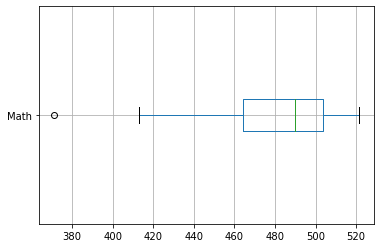

In [109]:
dfEU[["Math"]].boxplot(vert=False);

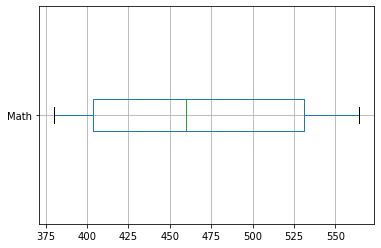

In [110]:
dfAS[["Math"]].boxplot(vert=False);

**EXERCISE 4.** The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

In [112]:
dfscores = pd.read_csv("students_2014.csv", sep = ",", na_values = ".", index_col = 0)

In [113]:
dfscores.sample(10)

,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
ids,,,,,,,,,,,,,,,,,,,,,
32304,8/7/1994,4-Aug-2014,11-May-2020,1.0,Aerospace engineering,1.0,1,67.24,157.19,0.0,...,82.77,73.27,55.81,79.15,In state,1.0,NaN,NaN,NaN,2.0
22617,12/4/1994,5-Aug-2013,14-May-2018,2.0,graphic design with a minor in photography,0.0,1,74.05,NaN,2.0,...,82.14,86.18,67.71,76.71,In state,1.0,NaN,NaN,5.0,7.0
38980,5/19/1995,4-Aug-2014,11-May-2020,1.0,bio,0.0,0,74.92,165.06,0.0,...,88.44,84.15,78.38,69.52,In state,0.0,3.0,27.0,6.0,5.0
49165,1/16/1992,6-Aug-2012,14-May-2018,3.0,NaN,NaN,1,66.32,185.90,2.0,...,90.18,91.35,61.72,75.24,In state,0.0,3.0,26.0,4.0,9.0
29045,9/17/1993,NaN,NaN,NaN,French,0.0,0,70.12,164.59,0.0,...,86.00,91.34,64.41,71.02,Out of state,0.0,3.0,20.0,1.0,6.0
37553,6/6/1992,5-Aug-2013,13-May-2019,2.0,NaN,0.0,0,68.22,167.04,0.0,...,82.86,80.98,67.23,79.49,In state,0.0,3.0,18.0,3.0,5.0
22494,12/5/1995,5-Aug-2013,14-May-2018,2.0,premed,0.0,1,64.92,129.16,0.0,...,83.11,75.79,65.43,NaN,NaN,NaN,NaN,NaN,4.0,5.0
36104,6/23/1994,5-Aug-2013,13-May-2019,2.0,eudcation,0.0,1,70.74,175.65,0.0,...,76.49,89.04,62.25,67.08,In state,0.0,3.0,26.0,1.0,10.0
40803,4/24/1993,4-Aug-2014,13-May-2019,1.0,what?,1.0,0,62.38,135.52,0.0,...,94.64,89.06,70.44,88.15,In state,1.0,NaN,NaN,3.0,2.0


In [114]:
dfscores.shape

(435, 22)

In [115]:
dfscores[["English", "Math"]].isnull().value_counts()

English  Math 
False    False    398
True     False     24
False    True      11
True     True       2
dtype: int64

In [118]:
# Drop NaN data 

dfscoresdrop = dfscores[["English", "Math"]].dropna()  # Note that NaN values are dropped in both columns 

In [117]:
dfscoresdrop.isnull().value_counts()

English  Math 
False    False    398
dtype: int64

In [119]:
dfscores[["English", "Math"]]

,English,Math
ids,,
43783,88.24,60.02
20278,89.45,70.19
20389,96.73,71.20
22820,74.06,55.89
24559,82.61,65.52
...,...,...
34021,87.72,65.31
40697,91.01,70.25
34272,81.05,58.16


In [120]:
dfscoresdrop

,English,Math
ids,,
43783,88.24,60.02
20278,89.45,70.19
20389,96.73,71.20
22820,74.06,55.89
24559,82.61,65.52
...,...,...
34021,87.72,65.31
40697,91.01,70.25
34272,81.05,58.16


In [121]:
dfscores[["English", "Math"]].describe().T

,count,mean,std,min,25%,50%,75%,max
English,409.0,82.787555,6.839803,59.83,78.3300,83.150,87.1700,101.95
Math,422.0,65.468009,8.375930,35.32,60.2025,65.445,70.5675,93.78


In [122]:
dfscores['English'].std()

6.839803158182041

In [123]:
dfscores['English'].var()

46.78290724267702

In [124]:
dfscores['Math'].std()

8.375929562049427

In [125]:
dfscores['Math'].var()

70.1561960284135

In [126]:
Englishmean =dfscores['English'].mean()
Englishmean

82.78755501222494

In [127]:
Mathmean = dfscores['Math'].mean()
Mathmean

65.46800947867298

In [128]:
Xmeandiff = Englishmean - Mathmean
Xmeandiff

17.31954553355196

In [ ]:
# Anlamlılık düzeyini %5 olarak alıyoruz

In [129]:
# stats.ttest_rel() fonksiyonunda  nan_policy='omit' parametresi kullanarak,
# NaN varsa fonksiyona katmıyor.

paired = stats.ttest_rel(dfscores["English"], dfscores["Math"], nan_policy='omit')
paired

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

In [ ]:
α = 0.05 #  α/2= 0.025

# p_value değeri  α/2'den küçükse H0 hipotezini reddederiz.


In [132]:
α = 0.05 #  α/2= 0.025

p_value=3.071098719220689e-128

if p_value < α/2:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [ ]:
#İngilizce ve Matematik puanlarının birbirinden önemli ölçüde farklı olduğu sonucuna varmak için,
# istatistiksel olarak yeterli kanıta sahip olabiliriz.